In [2]:
#Building neural network model
#importing the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input,LeakyReLU
from keras.models import Sequential
#from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:

def neural_network(data,out_var,in_neurons,hidden_neurons,epoch,batch_size):
    #Splitting the data into input and output
    x = data.drop(out_var,axis=1)
    y = data[out_var]
    
    #splitting the data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
    
    neural_network_model(x_train,x_test,y_train,y_test,in_neurons,hidden_neurons,epoch,batch_size)


In [4]:
#defining neural network model
def neural_network_model(x_train,x_test,y_train,y_test,in_neurons,hidden_neurons,epoch,batch_size): 
    act = ['tanh','relu','softplus','selu','elu','exponential',LeakyReLU(alpha=0.01)]
    df = []
    acc = []
    inp = []
    
    for i in tqdm(range(0,len(act))):
        #creating the model
        model = Sequential()
        #input layer
        model.add(Dense(units=in_neurons,input_dim=x_train.shape[1],kernel_initializer='uniform',activation=act[i],name='input_layer'))
        #1st hidden layer
        model.add(Dense(units=hidden_neurons,kernel_initializer='uniform',activation=act[i],name='hidden_layer'))
        #output layer
        model.add(Dense(units=to_categorical(y_train).shape[1],activation='softmax',name='output_layer'))

        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        #to print the weights after each epoch
        #print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

        # Fit the model
        history = model.fit(x_train, to_categorical(y_train), validation_data=(x_test,to_categorical(y_test)), epochs=epoch, batch_size=batch_size,verbose=0)
        
        inp.append([model])
        df.append(history)
        acc.append(max(history.history['accuracy']))
    
    #printing summary of trained neural network
    print(model.summary())
    
    res = pd.DataFrame({'Activation_Function':act,'Accuracy':acc})
    res.Activation_Function[6] = 'LeakyRelu'
    print('Best Activation function is {} with accuracy of {}'.format(res.Activation_Function[res.Accuracy.idxmax()],max(res.Accuracy)))
    
    #calculating f1_score
    y_pred = model.predict(x_test)
    print('F1_score for model with AF = {} is {}'.format(res.Activation_Function[res.Accuracy.idxmax()],f1_score(y_test,np.argmax(y_pred,axis=1),average='weighted')))
    
    #creating subplots and fixing the figure size
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    
    # summarize history for accuracy
    axes[0].plot(df[res.Accuracy.idxmax()].history['accuracy'])
    axes[0].plot(df[res.Accuracy.idxmax()].history['val_accuracy'])
    axes[0].set(xlabel='epoch', ylabel='accuracy')
    axes[0].set_title('model accuracy for AF - {}'.format(res.Activation_Function[res.Accuracy.idxmax()]))
    axes[0].legend(['train', 'test'])

    # summarize history for loss
    axes[1].plot(df[res.Accuracy.idxmax()].history['loss'])
    axes[1].plot(df[res.Accuracy.idxmax()].history['val_loss'])
    axes[1].set(xlabel='epoch', ylabel='loss')
    axes[1].set_title('model loss for AF - {}'.format(res.Activation_Function[res.Accuracy.idxmax()]))
    axes[1].legend(['train', 'test'])
    plt.show()
    
    #printing final epoch weights
    print('Weights of 1st layer after final epoch \n',inp[res.Accuracy.idxmax()][0].layers[0].get_weights()[0],'\n')
    print('Weights of 2nd layer after final epoch \n',inp[res.Accuracy.idxmax()][0].layers[1].get_weights()[0],'\n')
    print('Weights of 3rd layer after final epoch \n',inp[res.Accuracy.idxmax()][0].layers[2].get_weights()[0])
    return res

In [5]:
#importing the BankNote_Authentication dataset
bank = pd.read_csv('BankNote_Authentication.csv')
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.27s/it]


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 20        
_________________________________________________________________
hidden_layer (Dense)         (None, 8)                 40        
_________________________________________________________________
output_layer (Dense)         (None, 2)                 18        
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________
None
Best Activation function is relu with accuracy of 1.0
F1_score for model with AF = relu is 1.0


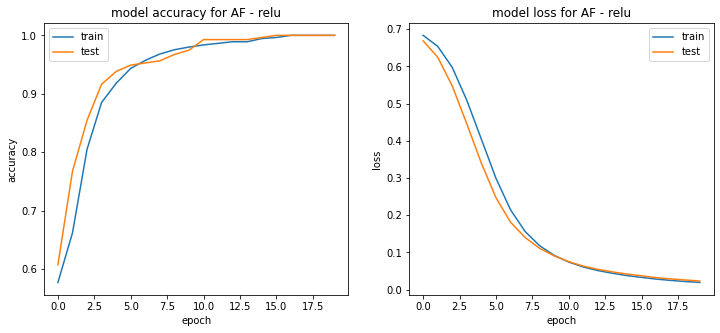

Weights of 1st layer after final epoch 
 [[-0.46945375 -0.5271943   0.43222195 -0.2670251 ]
 [-0.15170898 -0.18879248  0.31955838 -0.10746278]
 [-0.17152771  0.20018215  0.45554292 -0.28241736]
 [ 0.01000567  0.07620586 -0.15435855 -0.10482692]] 

Weights of 2nd layer after final epoch 
 [[-0.43315148 -0.00582426 -0.00657027  0.5718528  -0.03639249 -0.0017609
  -0.4046789   0.5009826 ]
 [ 0.04545088 -0.00779028 -0.01552339  0.33787635 -0.01482173 -0.03598522
   0.03087996  0.40269867]
 [ 0.49799705 -0.0027671   0.00460475 -0.40438262 -0.02957803 -0.01851994
   0.48529014 -0.40623468]
 [-0.31957224 -0.02058877 -0.04269849  0.5951994   0.00805263  0.00756233
  -0.30899134  0.53326905]] 

Weights of 3rd layer after final epoch 
 [[ 0.92579234 -0.8852794 ]
 [-0.5156479  -0.19212675]
 [ 0.03871712  0.44499236]
 [-0.8361529   0.3674194 ]
 [ 0.6139675  -0.10495102]
 [ 0.11738288 -0.16587937]
 [ 0.27390876 -1.2909058 ]
 [-0.96090025  0.34442493]]


In [6]:
data = bank
out_var = 'class'
input_neurons = 4
hidden_neurons=8
epoch = 20
batch_size = 32
result = neural_network(data,out_var,input_neurons,hidden_neurons,epoch,batch_size)

In [7]:
#importing cancer dataset
cancer = pd.read_csv('Wisconsin Breast Cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#encoding output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
cancer.diagnosis = encod.fit_transform(cancer.diagnosis)
cancer.drop(['id','Unnamed: 32'],axis=1,inplace=True)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:29<00:00,  4.17s/it]


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                992       
_________________________________________________________________
hidden_layer (Dense)         (None, 64)                2112      
_________________________________________________________________
output_layer (Dense)         (None, 2)                 130       
Total params: 3,234
Trainable params: 3,234
Non-trainable params: 0
_________________________________________________________________
None
Best Activation function is selu with accuracy of 0.9428571462631226
F1_score for model with AF = selu is 0.9290184921763869


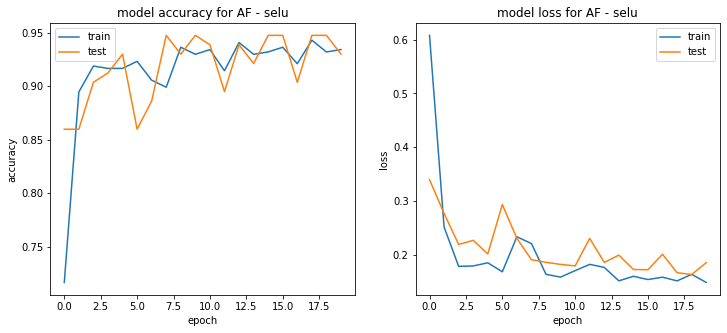

Weights of 1st layer after final epoch 
 [[-4.76365462e-02 -2.64460370e-02  2.90022083e-02 -1.09746642e-02
  -1.49437850e-02 -3.72943543e-02 -4.48479876e-02 -1.42059140e-02
  -3.81445847e-02  2.35039890e-02 -1.86181962e-02 -5.99172078e-02
  -1.97174884e-02  9.26592015e-03 -4.01127487e-02 -2.02733371e-02
   7.72595173e-03  1.66309290e-02 -8.46538786e-03  1.13342116e-02
  -2.28364747e-02 -2.02315915e-02 -1.84965357e-02 -1.97489951e-02
  -3.14710625e-02 -1.86231118e-02  2.59348527e-02  3.19083594e-03
  -3.34411934e-02 -3.05142663e-02 -1.79425944e-02 -1.87312774e-02]
 [ 5.87739050e-03  1.86556240e-03  1.90468691e-02  3.63468677e-02
  -1.53653920e-02 -3.04167774e-02 -3.64755094e-02 -2.39055119e-02
   9.13390424e-03  2.65932418e-02  3.44264992e-02 -2.21415553e-02
   4.23334204e-02  2.90773879e-03  4.01447006e-02  3.39856558e-02
   3.23244520e-02  8.74912087e-03 -2.43814364e-02  5.18185692e-03
   3.71167362e-02 -8.27597920e-03  4.16150726e-02  2.05022329e-03
  -8.25748034e-03 -8.96056276e-03 

In [9]:
data = cancer
out_var = 'diagnosis'
input_neurons = 32
hidden_neurons=64
epoch = 20
batch_size = 32
result = neural_network(data,out_var,input_neurons,hidden_neurons,epoch,batch_size)

In [10]:
#importing iris dataset
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
#encoding output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
iris.Species = encod.fit_transform(iris.Species)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.18s/it]


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 64)                320       
_________________________________________________________________
hidden_layer (Dense)         (None, 300)               19500     
_________________________________________________________________
output_layer (Dense)         (None, 3)                 903       
Total params: 20,723
Trainable params: 20,723
Non-trainable params: 0
_________________________________________________________________
None
Best Activation function is tanh with accuracy of 0.9833333492279053
F1_score for model with AF = tanh is 1.0


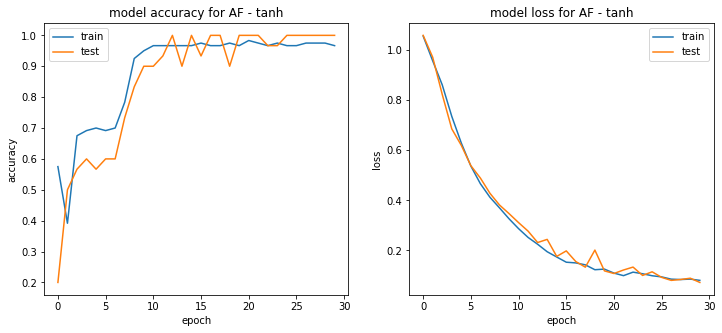

Weights of 1st layer after final epoch 
 [[-0.05702277 -0.01757701 -0.05094949  0.04211515  0.00274846 -0.00549844
   0.01240624  0.01713753  0.06299966 -0.00296693  0.02005093  0.04403998
  -0.04568214 -0.00559317 -0.01327575  0.05497625  0.04926545  0.02736888
   0.04718154 -0.01301323 -0.02975853  0.01224124 -0.0435135  -0.06813772
   0.00705434 -0.006557    0.03631942 -0.00132074 -0.02014671 -0.00740766
   0.05638181  0.04947203 -0.01465242  0.00405289 -0.04274574  0.01706806
   0.04256218  0.01721281 -0.02767273  0.02257098  0.06159765 -0.01577055
  -0.06739598  0.04377885 -0.01466335 -0.02329966 -0.0349367   0.04572681
   0.05471324  0.02204091 -0.00018696  0.02639865  0.04227015  0.05628759
   0.00987277  0.01717634  0.00494947 -0.05970727  0.01699778 -0.02604732
  -0.00647217  0.03500182  0.01810513 -0.02926878]
 [-0.02775205 -0.0211657   0.00153834  0.03505414  0.07839567  0.01333002
   0.01666495  0.05838853 -0.02777024  0.07824342 -0.05113982  0.05816733
  -0.05493092  0.079

In [12]:
data = iris
out_var = 'Species'
input_neurons = 64
hidden_neurons=300
epoch = 30
batch_size = 32
result = neural_network(data,out_var,input_neurons,hidden_neurons,epoch,batch_size)

In [1]:
#creating neural network for MNIST data

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [14]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
from keras.utils import to_categorical

In [19]:
print("Class label of first image :", y_train[0])

Y_train = tf.keras.utils.to_categorical(y_train, 10) 
Y_test = tf.keras.utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
len_flatten = np.product(X_train.shape[1:])
X_train_flatten = X_train.reshape(X_train.shape[0],len_flatten)
X_test_flatten = X_test.reshape(X_test.shape[0],len_flatten)

In [21]:
model = Sequential()

model.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model.add(Dense(units=128, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=64, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=10, activation='softmax',kernel_initializer='uniform'))

In [22]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 478,250
Trainable params: 478,250
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(X_train_flatten, Y_train,epochs=10,validation_split=.25)

Epoch 1/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7326 - accuracy: 0.7587 - val_loss: 0.2206 - val_accuracy: 0.9360
Epoch 2/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1488 - accuracy: 0.9566 - val_loss: 0.1222 - val_accuracy: 0.9644
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0947 - accuracy: 0.9728 - val_loss: 0.1288 - val_accuracy: 0.9635
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.1137 - val_accuracy: 0.9685
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.1009 - val_accuracy: 0.9729
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0419 - accuracy: 0.9879 - val_loss: 0.1064 - val_accuracy: 0.9712
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.1121 - val_acc

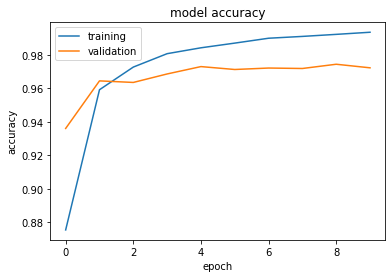

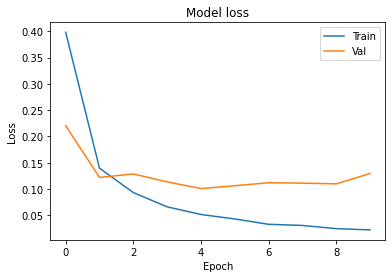

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [26]:
model.evaluate(X_test_flatten,Y_test)
model.evaluate(X_train_flatten,Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9883


[0.04761062562465668, 0.9882833361625671]

In [27]:
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

In [28]:
prediction = model.predict(X_test_flatten)

prediction_binary = np.argmax(prediction, axis=1)
y_test_binary = np.argmax(Y_test, axis=1)

print(f1_score(y_test_binary, prediction_binary, average='micro'))

0.9738


In [29]:
cm = confusion_matrix(y_test_binary, prediction_binary)

In [30]:
print(metrics.classification_report(y_test_binary, prediction_binary))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.95      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.95      0.97      0.96       892
           6       0.96      0.99      0.97       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.94      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

